In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
AdaBoost = pickle.load(open('AdaBoost.pkl', 'rb'))
DecisionTree = pickle.load(open('DecisionTree.pkl', 'rb'))
GaussianNB = pickle.load(open('GaussianNB.pkl', 'rb'))
KNeighbours = pickle.load(open('KNeighbours.pkl', 'rb'))
LogisticRegression = pickle.load(open('LogisticRegression.pkl', 'rb'))
SVC = pickle.load(open('SVC.pkl', 'rb'))
XGBClassifier = pickle.load(open('XGBClassifier.pkl', 'rb'))

In [3]:
data = pd.read_csv('test_data.csv').dropna()
data.head()

,Home_Team,Away_Team,Home_ELO,Away_ELO,Last_5_Home_Team_avgGoal,Last_5_Away_Team_avgGoal,Last_5_Home_Team_Home_avgGoal,Last_5_Away_Team_Away_avgGoal,Last_5_Home_Team_All_Streak,Last_5_Away_Team_All_Streak,Last_5_Home_Team_Home_Streak,Last_5_Away_Team_Away_Streak,Last_3_same_team_home_goal,Last_3_same_team_away_goal,Last_3_same_team_outcome,Home_Team_Points,Away_Team_Points,Outcome
0,West Bromwich Albion,Man. Utd,75,95,1.0,1.0,1.0,1.0,2.0,-1.0,1.0,0.0,0.000000,0.000000,0,13,7,-1
2,Chelsea,AFC Bournemouth,94,70,2.2,1.0,2.2,1.0,1.0,2.0,4.0,2.0,0.000000,0.000000,0,41,11,-1
4,Chelsea,Stoke City,96,78,2.8,1.4,2.8,1.4,3.0,2.0,4.0,1.0,0.000000,0.000000,0,68,42,1
5,Arsenal,Queens Park Rangers,93,66,1.8,0.4,1.8,0.4,2.0,5.0,1.0,5.0,0.000000,0.000000,0,15,0,1
6,Aston Villa,Crystal Palace,70,74,0.6,0.8,0.6,0.8,-2.0,-1.0,-4.0,1.0,0.333333,0.333333,0,27,9,1


In [4]:
le = pickle.load(open('labelencoder.pkl', 'rb'))
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])

In [5]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
models = ['AdaBoost', 'DecisionTree', 'GaussianNB', 'KNeighbours', 'LogisticRegression', 'SVC', 'XGBClassifier']
f1_scores = []
for model in models:
    if model == 'AdaBoost':
        model = AdaBoost
    elif model == 'DecisionTree':
        model = DecisionTree
    elif model == 'GaussianNB':
        model = GaussianNB
    elif model == 'KNeighbours':
        model = KNeighbours
    elif model == 'LogisticRegression':
        model = LogisticRegression
    elif model == 'SVC':
        model = SVC
    elif model == 'XGBClassifier':
        model = XGBClassifier
    pred_y = model.predict(X)
    f1_scores.append(f1_score(y, pred_y, average='weighted'))

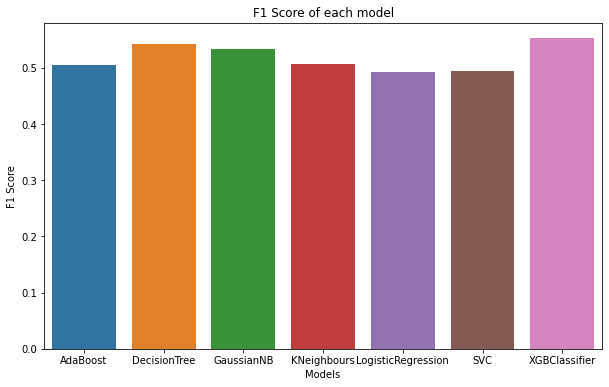

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores)
sns.barplot(x=models, y=f1_scores)
plt.title('F1 Score of each model')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()


In [9]:
accuracy = []
for model in models:
    if model == 'AdaBoost':
        model = AdaBoost
    elif model == 'DecisionTree':
        model = DecisionTree
    elif model == 'GaussianNB':
        model = GaussianNB
    elif model == 'KNeighbours':
        model = KNeighbours
    elif model == 'LogisticRegression':
        model = LogisticRegression
    elif model == 'SVC':
        model = SVC
    elif model == 'XGBClassifier':
        model = XGBClassifier
    pred_y = model.predict(X)
    accuracy.append(np.mean(pred_y == y))

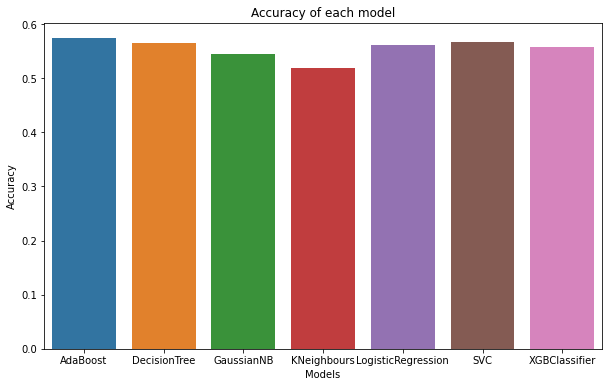

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy)
sns.barplot(x=models, y=accuracy)
plt.title('Accuracy of each model')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [11]:
y_pred_y_true = []
for model in models:
    if model == 'AdaBoost':
        model = AdaBoost
    elif model == 'DecisionTree':
        model = DecisionTree
    elif model == 'GaussianNB':
        model = GaussianNB
    elif model == 'KNeighbours':
        model = KNeighbours
    elif model == 'LogisticRegression':
        model = LogisticRegression
    elif model == 'SVC':
        model = SVC
    elif model == 'XGBClassifier':
        model = XGBClassifier
    pred_y = model.predict(X)
    counts = 0
    for i in range(len(pred_y)):
        if pred_y[i] == y[i]:
            counts += 1
    y_pred_y_true.append(counts)

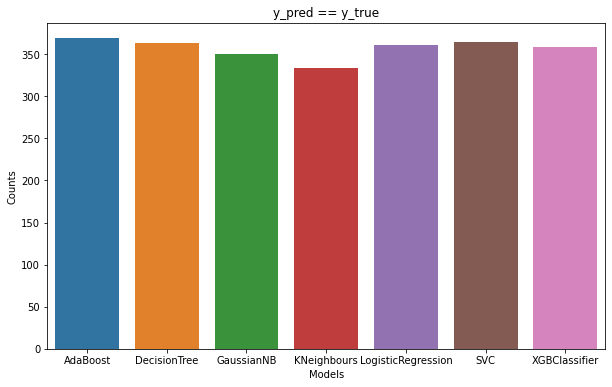

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(models, y_pred_y_true)
sns.barplot(x=models, y=y_pred_y_true)
plt.title('y_pred == y_true')
plt.xlabel('Models')
plt.ylabel('Counts')
plt.show()
